In [69]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from scipy.misc import derivative
import time

In [70]:
data= pd.read_csv("Kirby2.txt",names=['y','x'], sep=" ")

data

,y,x
NaN,0.0082,9.65
NaN,0.0112,10.74
NaN,0.0149,11.81
NaN,0.0198,12.88
NaN,0.0248,14.06
...,...,...
NaN,90.5500,360.20
NaN,90.9300,362.67
NaN,91.2000,364.53
NaN,91.5500,367.00


In [71]:
y = torch.from_numpy(data['y'].to_numpy(np.float64))
x = torch.from_numpy(data['x'].to_numpy(np.float64))

b = torch.tensor([2.0,-0.1,0.003,-0.001,0.00001],requires_grad=True)
# b = torch.tensor([1.5,-0.15,0.0025,-0.0015,0.00002],requires_grad=True)

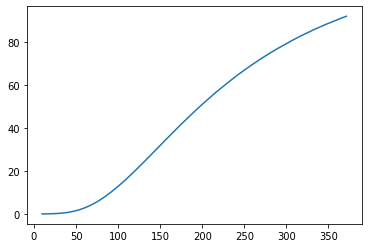

In [72]:
plt.plot(x.numpy(),y.numpy())

In [73]:
## Numerical Differentiation

# b = np.array([2.0,-0.1,0.003,-0.001,0.00001]).reshape(-1,1)
# # b = np.array([100.0,0.75]).reshape(-1,1)

# x=x.detach().numpy()

# u=0.1 #beta multiply identity matrix
# beta = 10
# V_prev = 0


# def f0(b0):
#     return (b0 + b[1]*x + b[2]*np.square(x)) / (1 + b[3]*x + b[4]*np.square(x))  +  np.exp(1.0) -y.detach().numpy()  
# def f1(b1):
#     return (b[0] + b1*x + b[2]*np.square(x)) / (1 + b[3]*x + b[4]*np.square(x))  +  np.exp(1.0) -y.detach().numpy()  
# def f2(b2):
#     return (b[0] + b[1]*x + b2*np.square(x)) / (1 + b[3]*x + b[4]*np.square(x))  +  np.exp(1.0)-y.detach().numpy()  
# def f3(b3):
#     return (b[0] + b[1]*x + b[2]*np.square(x)) / (1 + b3*x + b[4]*np.square(x))  +  np.exp(1.0)-y.detach().numpy()
# def f4(b4):
#     return (b[0] + b[1]*x + b[2]*np.square(x)) / (1 + b[3]*x + b4*np.square(x))  +  np.exp(1.0)-y.detach().numpy()  


# start_time = time.time()
# for c in range(500):
#     y_pred =(b[0] + b[1]*x + b[2]*np.square(x)) / (1 + b[3]*x + b[4]*np.square(x))  +  np.exp(1.0)
#     error = (y_pred - y.detach().numpy()).reshape(-1,1)
    
#     d_b0 = derivative(f0,b[0] , dx=1e-6)
#     d_b1 = derivative(f1,b[1] , dx=1e-6)
#     d_b2 = derivative(f2,b[2] , dx=1e-6)
#     d_b3 = derivative(f3,b[3] , dx=1e-6)
#     d_b4 = derivative(f4,b[4] , dx=1e-6)
    
     
#     jacobian = np.transpose(np.array([d_b0,d_b1,d_b2,d_b3,d_b4]))
#     dParam = np.matmul(np.matmul(np.linalg.inv((np.matmul(np.transpose(jacobian),jacobian)+u*np.identity(len(b)))),np.transpose(jacobian)),error)
#     b -= dParam
#     V = np.sum(np.square(error))
#     if(V > V_prev):
#             u *= beta
#     else:
#             u /= beta
#     V_prev = V
#     print("c: ",c," error: ",V," B:", b)
    
#     if V < 3.9050739625:
#         break
# print("time taken to execute: ",time.time()-start_time)  

In [74]:
def Jacobian(loss,params,numParams):
    
    jacobian = torch.empty(len(loss), numParams) 
    
    for i in range(len(loss)):
        
        loss[i].backward(retain_graph=True)
        
        for n in range(numParams):
            jacobian[i][n] = params.grad[n]
        params.grad.zero_()      
    return jacobian    
              

 0  error is:  407170.50101725745  b is  [ 2.e+00 -1.e-01  3.e-03 -1.e-03  1.e-05]
 1  error is:  33998.552731893295  b is  [-7.1103334e-01 -1.6259955e-01  3.0323656e-03 -1.2216205e-04
  1.4467617e-05]
 2  error is:  677.4396996847383  b is  [-7.5646013e-01 -1.5952915e-01  2.8606090e-03 -6.8718288e-04
  2.0255917e-05]
 3  error is:  7.327662017029144  b is  [-1.0743562e+00 -1.3290888e-01  2.5214222e-03 -1.7567298e-03
  2.1713255e-05]
 4  error is:  3.90509634851561  b is  [-1.0425310e+00 -1.3465323e-01  2.5378398e-03 -1.7235737e-03
  2.1668269e-05]
 5  error is:  3.9050740114472298  b is  [-1.0438586e+00 -1.3458201e-01  2.5371742e-03 -1.7242539e-03
  2.1664564e-05]
 6  error is:  3.9050739647754615  b is  [-1.0437678e+00 -1.3458763e-01  2.5372319e-03 -1.7241749e-03
  2.1664824e-05]
 7  error is:  3.905073964690452  b is  [-1.0437763e+00 -1.3458712e-01  2.5372265e-03 -1.7241816e-03
  2.1664800e-05]
 8  error is:  3.905073962429607  b is  [-1.0437753e+00 -1.3458717e-01  2.5372270e-03 -1.

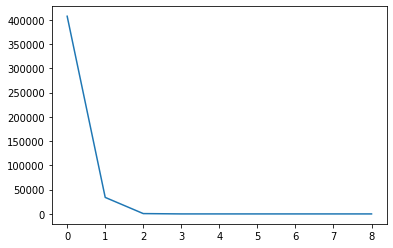

In [75]:
### Gauss-Newton Method with AD
loss_graph = torch.empty(0)
start_time = time.perf_counter()
for c in range(100):
    y_pred =(b[0] + b[1]*x + b[2]*torch.square(x)) / (1 + b[3]*x + b[4]*torch.square(x))  +  torch.exp(torch.tensor([1.0]))

    loss = y_pred-y
    error = torch.sum(torch.square(loss)) ##Residual sum of squares
    print("",c," error is: ",error.detach().numpy()," b is ", b.detach().numpy())
    jacobian = Jacobian(loss,b,len(b))

    loss_graph = torch.cat((loss_graph, error.detach().flatten().float()),0)
    
    dParam = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(jacobian,-1,0),jacobian)),torch.transpose(jacobian,-1,0)),loss.float())
    with torch.no_grad():
        b -=dParam
    if error<3.9050739625E+00: #3.9050739624 given residual sum of squares
        break
print("time taken to execute: ",time.perf_counter()-start_time)   
plt.plot(loss_graph)

In [76]:
## Automatic Differentiation
# num_param = len(b)
# u=0.1 #beta multiply identity matrix
# beta = 10
# error_prev = 0
# start_time = time.perf_counter()
# for c in range(100):
#     y_pred =(b[0] + b[1]*x + b[2]*torch.square(x)) / (1 + b[3]*x + b[4]*torch.square(x))  +  torch.exp(torch.tensor([1.0]))


#     loss = y_pred-y
#     error = torch.sum(torch.square(loss)) #residual sum of squares
#     print("",c," error is: ",error.detach().numpy()," b is ", b.detach().numpy())
#     jacobian = Jacobian(loss,b,len(b))

#     dParam = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(jacobian,-1,0),jacobian)+u*torch.eye(num_param, num_param)),torch.transpose(jacobian,-1,0)),loss.float())
#     with torch.no_grad():
#         b -=dParam
    
#         if(error > error_prev):
#             u *= beta
#         else:
#             u /= beta
#         error_prev = error
#     if error<3.9050739625: #3.9050739624 given residual sum of squares
#         break
# print("time taken to execute: ",time.perf_counter()-start_time)    

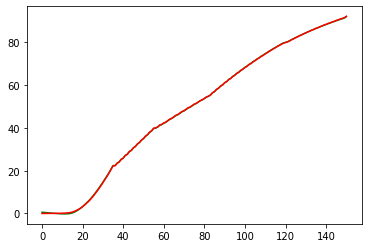

In [77]:
plt.plot(y_pred.detach(),'g', y,'r')